# Data wrangling and exploration

We begin by loading the two data sets and looking at the different attributes. We decide to add two columns **Movie release year** and **Actor birth year**.

In [14]:
# Data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

# Added
import statsmodels.formula.api as smf

In [15]:
# Load datasets
data_folder = './data_cleaned/'
movie_metadata = pd.read_csv(data_folder + 'movie_cleaned.csv', lineterminator='\n')
character_metadata = pd.read_csv(data_folder + 'character_cleaned.csv')

/var/folders/zp/zj6kbf7d5mv37j0rsdb53g200000gn/T/ipykernel_52884/132682489.py:3: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_metadata = pd.read_csv(data_folder + 'movie_cleaned.csv', lineterminator='\n')


In [16]:
character_metadata

,Unnamed: 0,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character map,Freebase character ID,Freebase actor ID,Movie release year,Actor birth year,log Movie release year
0,0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001.0,1958.0,7.601402
1,1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001.0,1974.0,7.601402
2,2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001.0,1969.0,7.601402
3,3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001.0,1967.0,7.601402
4,4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001.0,1977.0,7.601402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,1992.0,1970.0,7.596894
450665,450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,1992.0,1965.0,7.596894
450666,450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,1957.0,1941.0,7.579168
450667,450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,1957.0,NaN,7.579168


In [17]:
movie_metadata.columns

Index(['Unnamed: 0', 'Wikipedia Movie ID', 'Freebase Movie ID', 'Movie name',
       'Movie release date', 'Movie runtime', 'Movie languages',
       'Movie countries', 'Movie genres', 'TMDB_id', 'TMDB_original_language',
       'TMDB_original_title', 'TMDB_overview', 'TMDB_popularity',
       'TMDB_release_date', 'TMDB_title', 'TMDB_vote_average',
       'TMDB_vote_count', 'TMDB_runtime', 'TMDB_budget', 'TMDB_IMDB_id',
       'TMDB_genres', 'Movie box office revenue', 'Movie release year',
       'log Movie box office revenue', 'log Movie release year'],
      dtype='object')

In [18]:
movie_metadata['TMDB_original_language'].isna().sum()

12797

# Start Emma

**Filter so that only movies with revenue are included**


In [116]:
mask = movie_metadata['Movie_box_office_revenue'].notna()
filtered_movie_metadata = movie_metadata[mask]

**Change column names**

In [37]:
# Replace spaces with underscores in column names
movie_metadata.columns = movie_metadata.columns.str.replace(' ', '_')


In [38]:
movie_metadata

,Unnamed:_0,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_name,Movie_release_date,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,TMDB_id,...,TMDB_vote_average,TMDB_vote_count,TMDB_runtime,TMDB_budget,TMDB_IMDB_id,TMDB_genres,Movie_box_office_revenue,Movie_release_year,log_Movie_box_office_revenue,log_Movie_release_year
0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,['English'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",10016.0,...,5.123,980.0,98.0,28000000.0,tt0228333,"Action, Horror, Science Fiction",14010832.0,2001.0,16.455341,7.601402
3,3,9363483,/m/0285_cd,White Of The Eye,1987,110.0,['English'],['United Kingdom'],"['Thriller', 'Erotic thriller', 'Psychological...",33592.0,...,5.742,64.0,111.0,0.0,tt0094320,"Horror, Thriller",NaN,1987.0,NaN,7.594381
4,4,261236,/m/01mrr1,A Woman in Flames,1983,106.0,['German'],['Germany'],['Drama'],11192.0,...,5.300,13.0,106.0,0.0,tt0083949,Drama,NaN,1983.0,NaN,7.592366
6,6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,86.0,['English'],['South Africa'],"['Family Film', 'Fantasy', 'Adventure', 'World...",50944.0,...,4.600,11.0,86.0,0.0,tt0120166,"Adventure, Family, Fantasy",NaN,2002.0,NaN,7.601902
7,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,106.0,['English'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",43839.0,...,6.600,23.0,106.0,2000000.0,tt0029852,"Drama, Music, Romance",3600000.0,1938.0,15.096444,7.569412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81732,81732,26482675,/m/0bbwngb,Eşrefpaşalılar,2010-03-05,NaN,[],[],"['Comedy film', 'Drama']",50009.0,...,5.300,8.0,NaN,NaN,NaN,NaN,1847671.0,2010.0,14.429436,7.605890
81733,81733,23851782,/m/06_vb43,The Ghost Train,1941-05-03,82.0,['English'],['United Kingdom'],"['Crime Fiction', 'Thriller', 'Comedy', 'Super...",29609.0,...,5.931,29.0,NaN,NaN,NaN,NaN,NaN,1941.0,NaN,7.570959
81735,81735,32468537,/m/0crwd9y,Shadow Boxing 2,2007-10-18,132.0,"['Russian', 'English']",['Russia'],"['Sports', 'Crime Fiction', 'Action', 'Drama']",56525.0,...,5.607,28.0,NaN,NaN,NaN,NaN,NaN,2007.0,NaN,7.604396
81736,81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,120.0,['English'],['United States of America'],['Drama'],117124.0,...,4.500,20.0,NaN,NaN,NaN,NaN,NaN,2011.0,NaN,7.606387


**TMDB vote count**


We filter the data so that movies with less than 4 ratings are taken out

In [39]:
# Define function that print the minimum and maximum values of a defines variable in the data frame
def get_min_and_max(df, variable_name, no_min, no_max):
    array = df[variable_name].fillna(0).unique()
    sorted_array = np.sort(array)
    
    min_values = sorted_array[:no_min]
    max_values = sorted_array[-no_max:]
    
    print(f"{no_min} minimum values of '{variable_name}':")
    print(min_values)
    print('\n')
    print(f"{no_max} maximum values of '{variable_name}':")
    print(max_values)

In [40]:
get_min_and_max(df=movie_metadata, variable_name='TMDB_vote_count', no_min=5, no_max=5)

5 minimum values of 'TMDB_vote_count':
[4. 5. 6. 7. 8.]


5 maximum values of 'TMDB_vote_count':
[27446. 29290. 29943. 30843. 34697.]


In [41]:
movie_metadata['TMDB_vote_count'].describe()

count    44423.000000
mean       290.734462
std       1288.213470
min          4.000000
25%          9.000000
50%         23.000000
75%         88.000000
max      34697.000000
Name: TMDB_vote_count, dtype: float64

In [42]:
condition = (movie_metadata['TMDB_vote_count'] >= 4)
movie_metadata = movie_metadata[condition]

Text(0.5, 1.0, 'Distribution of log of TMDB_vote_count')

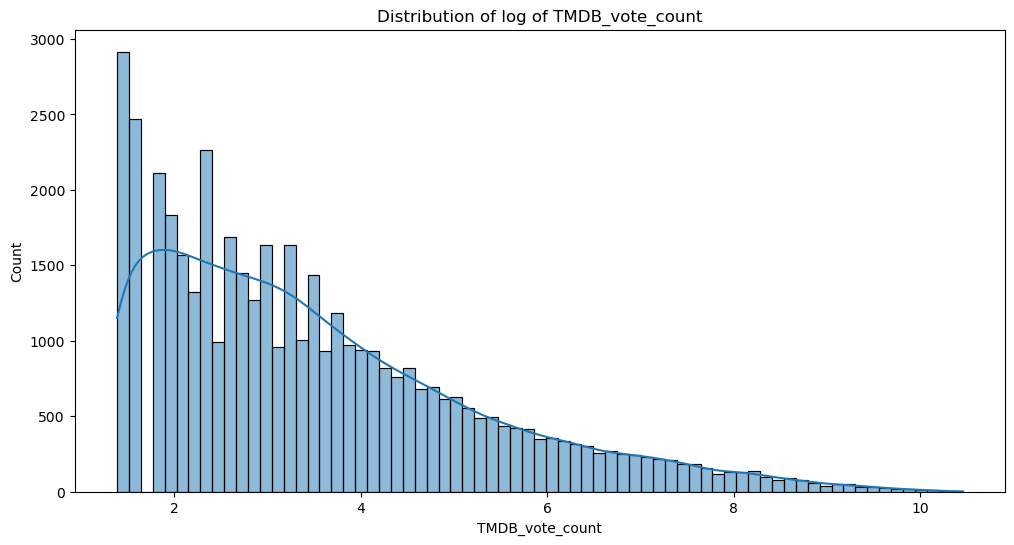

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(np.log(movie_metadata['TMDB_vote_count']),kde=True)
plt.title("Distribution of log of TMDB_vote_count")

**TMDB vote average**

Having filtered the data so every movie have at least 4 reviews we can now do a linear regression on TMDB vote average and movie release year

We first make a function to make the linear regression and plot

In [44]:
def plot_linear_regression(df, dependent_variable, independent_variable):
    """
    Function 
    """
    # Filter NaN values from specific columns
    df_filtered = df.dropna(subset=[dependent_variable, independent_variable])
    df_filtered = df_filtered.reset_index(drop=True)


    # Declare the model
    formula = f"{dependent_variable} ~ {independent_variable}"
    mod = smf.ols(formula=formula, data=df_filtered)

    # Fit the model
    np.random.seed(2)
    res = mod.fit()

    # Print the summary output provided by the library
    print(res.summary())

    # Plot the distribution of dependent_variable and independent_variable
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df_filtered[dependent_variable], kde=True)
    plt.title(f"Distribution of {dependent_variable}")

    plt.subplot(1, 2, 2)
    sns.histplot(df_filtered[independent_variable], kde=True)
    plt.title(f"Distribution of {independent_variable}")

    plt.tight_layout()
    plt.show()

    # Plot the linear regression line and regression points
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=independent_variable, y=dependent_variable, data=df_filtered, alpha=0.5)
    sns.regplot(x=independent_variable, y=dependent_variable, data=df_filtered, scatter=False, color='red', line_kws={'label':'Linear Regression Line'})

    plt.title(f"Linear Regression: {dependent_variable} vs. {independent_variable}")
    plt.xlabel(independent_variable)
    plt.ylabel(dependent_variable)
    plt.legend()
    plt.show()

In [46]:
movie_metadata['Movie_release_year']

0        2001.0
3        1987.0
4        1983.0
6        2002.0
7        1938.0
          ...  
81732    2010.0
81733    1941.0
81735    2007.0
81736    2011.0
81737    2011.0
Name: Movie_release_year, Length: 44423, dtype: float64

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     100.4
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.31e-23
Time:                        10:59:51   Log-Likelihood:                -64614.
No. Observations:               44423   AIC:                         1.292e+05
Df Residuals:                   44421   BIC:                         1.293e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.8015      0

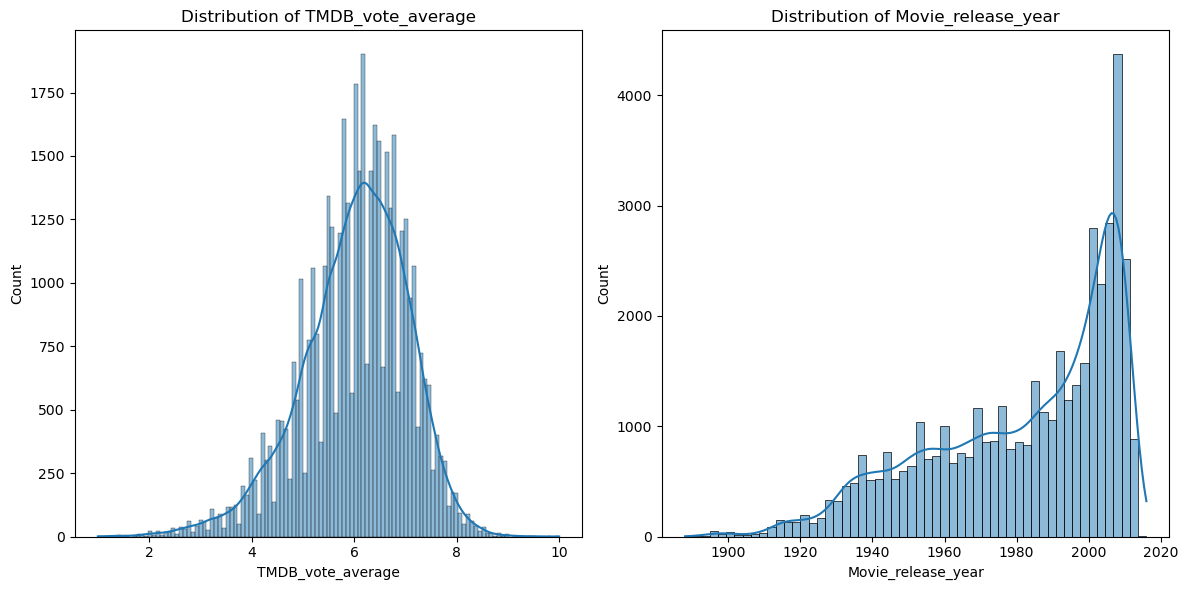

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


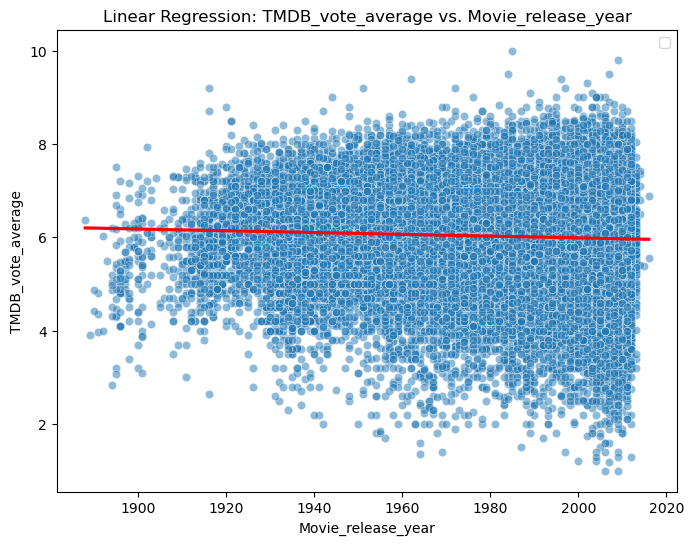

In [47]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "Movie_release_year")


**Runtime**

We now look at the runtime of the movie. We both have runtime from the original dataset and from the TMDB dataset. We can see that a lot of data is missing in TMDB runtime. Also data is missing in the movie metadata 

In [57]:
movie_metadata['TMDB_runtime'].isna().sum()

22444

In [58]:
movie_metadata['Movie_runtime'].isna().sum()

0

In [61]:
movie_metadata['Movie_runtime'].describe()

count    39899.000000
mean        95.499027
std         29.751595
min          0.000000
25%         86.000000
50%         95.000000
75%        108.000000
max        300.000000
Name: Movie_runtime, dtype: float64

In [59]:
# Fill missing values in 'Movie_runtime' with values from 'TMDB_runtime'
movie_metadata['Movie_runtime'] = movie_metadata['Movie_runtime'].fillna(movie_metadata['TMDB_runtime'])
movie_metadata['Movie_runtime'].isna().sum()

0

We managed to populate the Movie runtime column with data from the the TMDB runtime column. We filter by runtime: 

In [80]:
get_min_and_max(df=movie_metadata, variable_name='Movie_runtime', no_min=5, no_max=5)

5 minimum values of 'Movie_runtime':
[0.         0.03       0.05       0.08333333 0.1       ]


5 maximum values of 'Movie_runtime':
[285. 288. 295. 297. 300.]


In [89]:
condition1 = (movie_metadata['Movie_runtime'] > 5)
condition2 = (movie_metadata['Movie_runtime'] < 455)
movie_metadata = movie_metadata[condition1 & condition2]

In [90]:
movie_metadata['Movie_runtime'].describe()

count    39659.000000
mean        96.060057
std         28.951155
min          5.250000
25%         86.000000
50%         95.000000
75%        108.000000
max        300.000000
Name: Movie_runtime, dtype: float64

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     918.7
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          1.61e-199
Time:                        11:21:19   Log-Likelihood:                -57167.
No. Observations:               39659   AIC:                         1.143e+05
Df Residuals:                   39657   BIC:                         1.144e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.5114      0.018    309.656

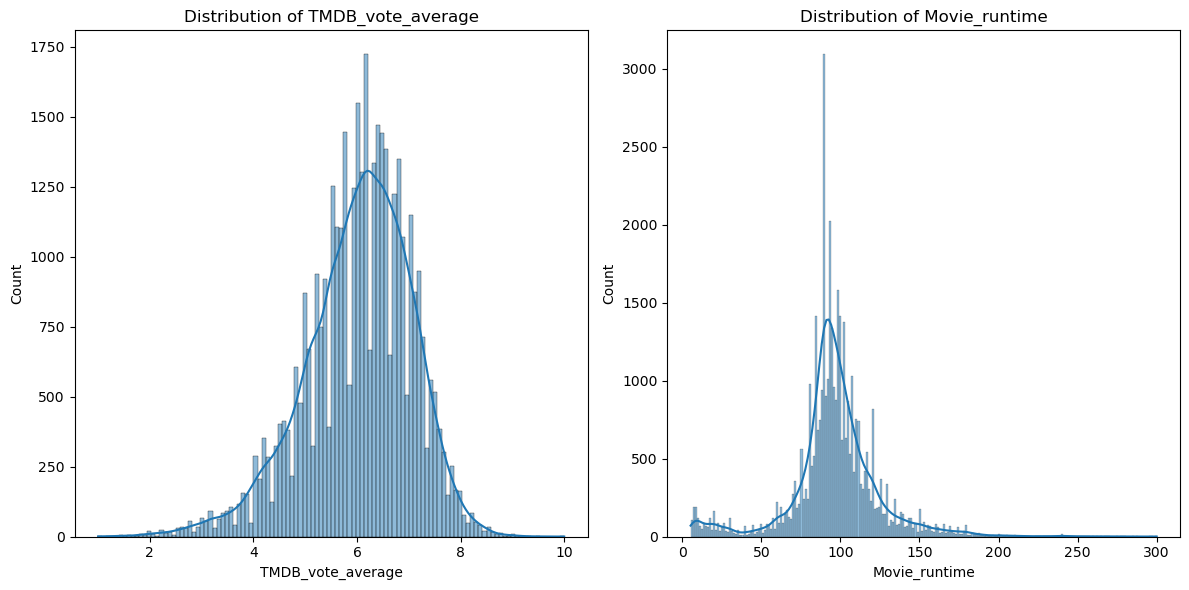

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


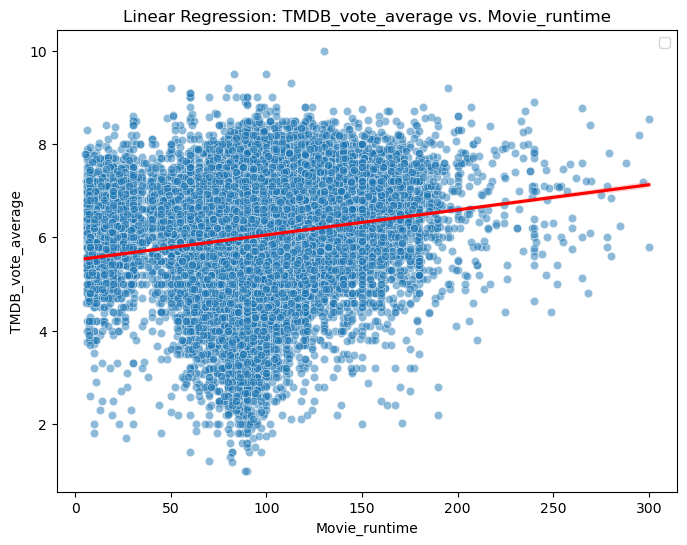

In [91]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "Movie_runtime")

**Vote count log**

In [92]:
movie_metadata['log_TMDB_vote_count'] = np.log(movie_metadata['TMDB_vote_count'])

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     5163.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:27:17   Log-Likelihood:                -55194.
No. Observations:               39659   AIC:                         1.104e+05
Df Residuals:                   39657   BIC:                         1.104e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.3035    

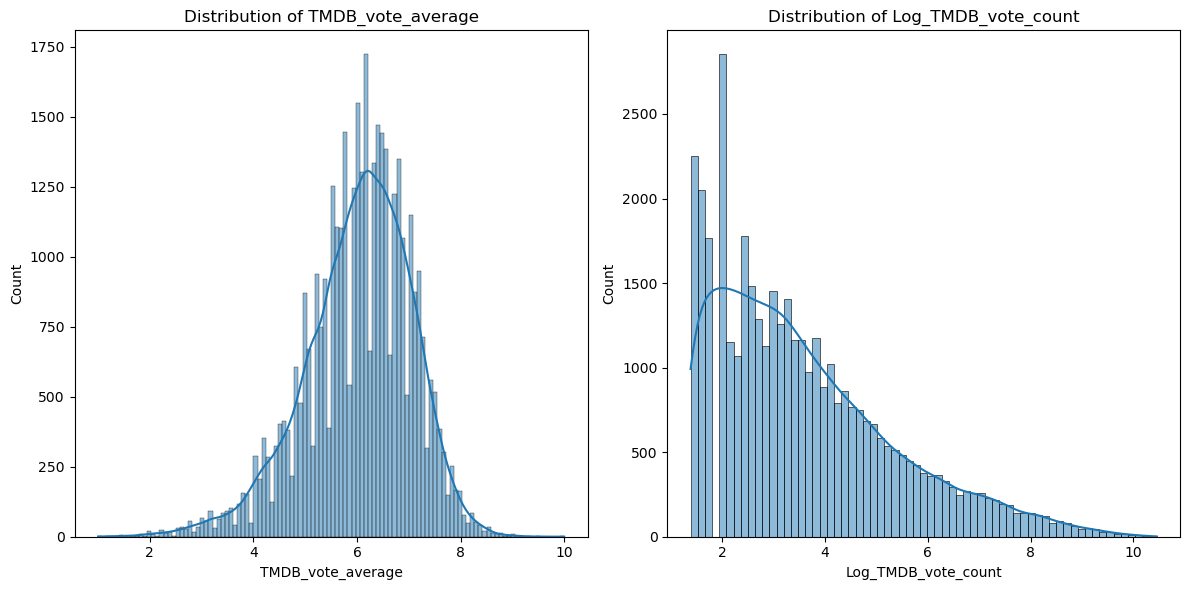

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


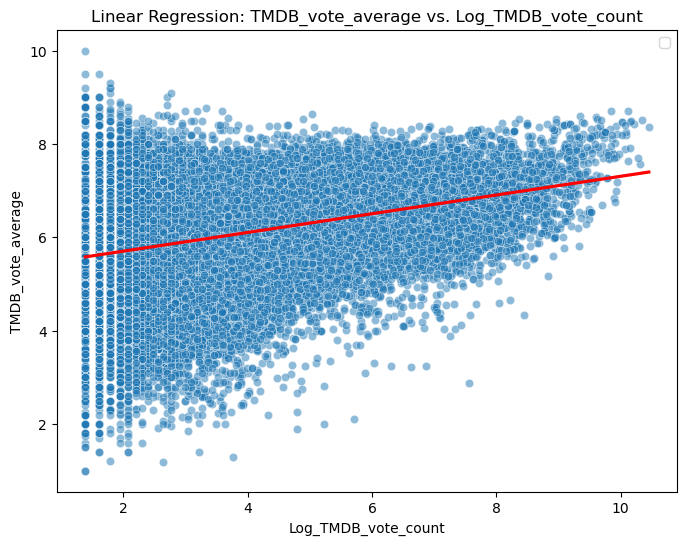

In [93]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "log_TMDB_vote_count")

**TMDB budget**

**New function**

In [111]:
def linear_regression(df, dependent_variable, independent_variables, categorical_variables=None):
    """
    Function to plot linear regression and distributions.

    Parameters:
    - df: DataFrame
    - dependent_variable: str, the name of the dependent variable
    - independent_variables: list, names of the independent variables (numerical or categorical)
    - categorical_variables: list, names of categorical variables

    """
    # Ensure independent_variables is a list
    if not isinstance(independent_variables, list):
        independent_variables = [independent_variables]

    # Ensure categorical_variables is a list
    if categorical_variables is None:
        categorical_variables = []
    elif not isinstance(categorical_variables, list):
        categorical_variables = [categorical_variables]

    # Filter NaN values from specific columns
    columns_to_filter = [dependent_variable] + independent_variables + categorical_variables
    df_filtered = df.dropna(subset=columns_to_filter)
    df_filtered = df_filtered.reset_index(drop=True)

    # Construct the formula
    formula = f"{dependent_variable} ~ {' + '.join(independent_variables)}"

    # Include categorical variables in the formula
    if categorical_variables:
        categorical_formula = ' + '.join([f'C({var})' for var in categorical_variables])
        formula += f" + {categorical_formula}"

    # Fit the model
    mod = smf.ols(formula=formula, data=df_filtered)
    res = mod.fit()

    # Print the summary output provided by the library
    print(res.summary())

    # Plot linear regression with Seaborn
    #sns.lmplot(x=dependent_variable, y=independent_variables[0], data=df_filtered, hue=categorical_variables[0] if categorical_variables else None, aspect=2, height=6)
    #plt.title(f"Linear Regression: {dependent_variable} vs. {independent_variables[0]}")

    # Plot the distribution of dependent_variable and independent_variables
    plt.figure(figsize=(12, 6))

    plt.subplot(1, len(independent_variables) + 1, 1)
    sns.histplot(df_filtered[dependent_variable], kde=True)
    plt.title(f"Distribution of {dependent_variable}")

    for i, variable in enumerate(independent_variables, start=2):
        plt.subplot(1, len(independent_variables) + 1, i)
        sns.histplot(df_filtered[variable], kde=True)
        plt.title(f"Distribution of {variable}")

    plt.tight_layout()
    plt.show()

In [113]:
get_min_and_max(movie_metadata, 'TMDB_budget', 5, 5)

5 minimum values of 'TMDB_budget':
[0. 1. 3. 5. 6.]


5 maximum values of 'TMDB_budget':
[2.25e+08 2.37e+08 2.50e+08 2.58e+08 3.79e+08]


In [114]:
movie_metadata['TMDB_budget'].describe()

count    1.735500e+04
mean     4.246090e+06
std      1.650675e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.790000e+08
Name: TMDB_budget, dtype: float64

In [99]:
movie_metadata.isna().sum()

Unnamed:_0                          0
Wikipedia_Movie_ID                  0
Freebase_Movie_ID                   0
Movie_name                          0
Movie_release_date                  0
Movie_runtime                       0
Movie_languages                     0
Movie_countries                     0
Movie_genres                        0
TMDB_id                             0
TMDB_original_language              0
TMDB_original_title                 0
TMDB_overview                     154
TMDB_popularity                     0
TMDB_release_date                   3
TMDB_title                          0
TMDB_vote_average                   0
TMDB_vote_count                     0
TMDB_runtime                    22304
TMDB_budget                     22304
TMDB_IMDB_id                    22315
TMDB_genres                     22461
Movie_box_office_revenue        30442
Movie_release_year                  0
log_Movie_box_office_revenue    30442
log_Movie_release_year              0
Log_TMDB_vot

In [115]:
movie_metadata.shape

(39659, 27)

In [95]:
movie_metadata.columns

Index(['Unnamed:_0', 'Wikipedia_Movie_ID', 'Freebase_Movie_ID', 'Movie_name',
       'Movie_release_date', 'Movie_runtime', 'Movie_languages',
       'Movie_countries', 'Movie_genres', 'TMDB_id', 'TMDB_original_language',
       'TMDB_original_title', 'TMDB_overview', 'TMDB_popularity',
       'TMDB_release_date', 'TMDB_title', 'TMDB_vote_average',
       'TMDB_vote_count', 'TMDB_runtime', 'TMDB_budget', 'TMDB_IMDB_id',
       'TMDB_genres', 'Movie_box_office_revenue', 'Movie_release_year',
       'log_Movie_box_office_revenue', 'log_Movie_release_year',
       'Log_TMDB_vote_count'],
      dtype='object')

**Original language with new function**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     30.52
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:03:05   Log-Likelihood:                -56205.
No. Observations:               39659   AIC:                         1.126e+05
Df Residuals:                   39562   BIC:                         1.134e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

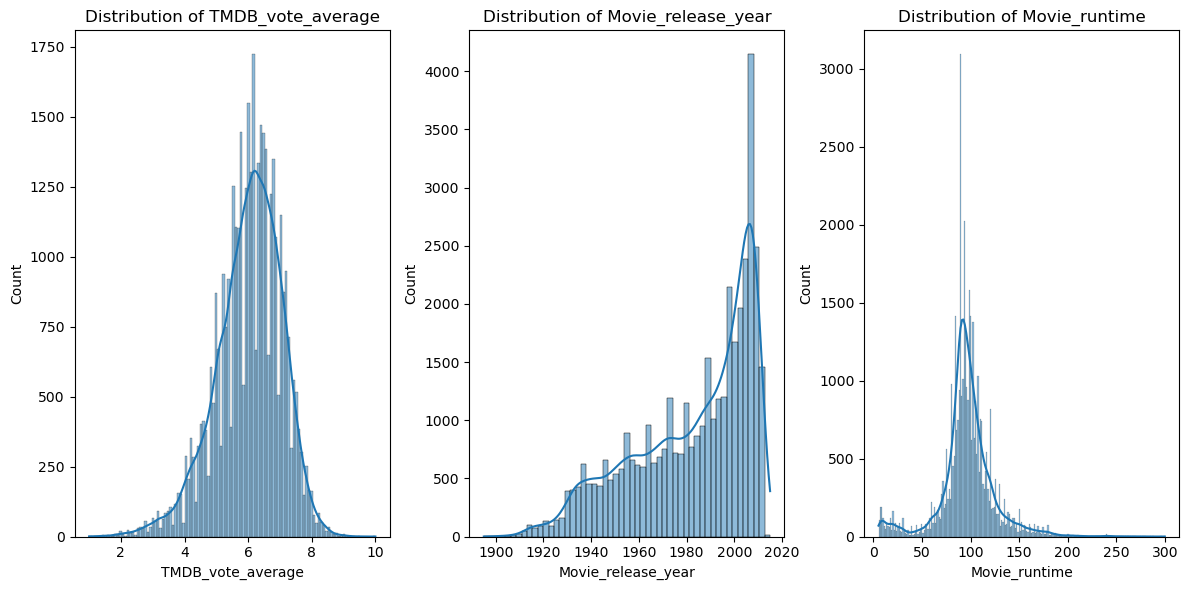

In [110]:
# Example usage
# Replace 'movie_metadata' with your actual DataFrame
linear_regression(movie_metadata, "TMDB_vote_average", ["Movie_release_year", "Movie_runtime"], categorical_variables=["TMDB_original_language"])
